In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
covid = pd.read_csv('full_data.csv')

In [5]:
#Having a glance at some of the records
covid.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
0,2020-02-24,Afghanistan,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,2020-02-25,Afghanistan,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,2020-02-26,Afghanistan,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,2020-02-27,Afghanistan,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,2020-02-28,Afghanistan,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [6]:
#Looking at the shape
covid.shape

(59918, 10)

In [7]:
covid.columns

Index(['date', 'location', 'new_cases', 'new_deaths', 'total_cases',
       'total_deaths', 'weekly_cases', 'weekly_deaths', 'biweekly_cases',
       'biweekly_deaths'],
      dtype='object')

In [8]:
#Looking at the different locations
covid["location"].value_counts()

Japan               361
Thailand            361
South Korea         361
United States       361
China               361
                   ... 
Lesotho             249
Solomon Islands      97
Marshall Islands     81
Vanuatu              68
Samoa                60
Name: location, Length: 191, dtype: int64

In [9]:
#Checking if columns have null values
covid.isna().any()

date               False
location           False
new_cases           True
new_deaths          True
total_cases        False
total_deaths        True
weekly_cases        True
weekly_deaths       True
biweekly_cases      True
biweekly_deaths     True
dtype: bool

In [10]:
#Getting the sum of null values across each column
covid.isna().sum()

date                  0
location              0
new_cases             7
new_deaths         8454
total_cases           0
total_deaths       8453
weekly_cases        962
weekly_deaths       962
biweekly_cases     2299
biweekly_deaths    2299
dtype: int64

In [11]:
#Getting the cases in India
india_case=covid[covid["location"]=="India"] 

In [12]:
india_case.tail()

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
24478,2021-01-12,India,15968.0,202.0,10495147.0,151529.0,120215.0,1415.0,250295.0,3090.0
24479,2021-01-13,India,16946.0,198.0,10512093.0,151727.0,116815.0,1391.0,245419.0,2989.0
24480,2021-01-14,India,15590.0,191.0,10527683.0,151918.0,114266.0,1348.0,261009.0,3180.0
24481,2021-01-15,India,15158.0,175.0,10542841.0,152093.0,129424.0,1523.0,256132.0,3099.0
24482,2021-01-16,India,15144.0,181.0,10557985.0,152274.0,107701.0,1275.0,234020.0,2839.0


In [13]:
india_case.shape

(353, 10)

In [14]:
india_case.isnull().sum()

date                0
location            0
new_cases           0
new_deaths         41
total_cases         0
total_deaths       41
weekly_cases        5
weekly_deaths       5
biweekly_cases     12
biweekly_deaths    12
dtype: int64

In [15]:
mean_new_deaths=india_case['new_deaths'].mean()
mean_new_deaths
india_case['new_deaths']=india_case.replace(np.NaN,mean_new_deaths)

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
india_case['new_deaths']=india_case.replace(np.NaN,mean_new_deaths)

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
india_case.isnull().sum()

date                0
location            0
new_cases           0
new_deaths          0
total_cases         0
total_deaths       41
weekly_cases        5
weekly_deaths       5
biweekly_cases     12
biweekly_deaths    12
dtype: int64

In [18]:
mean_total_deaths=india_case['total_deaths'].mean()
mean_total_deaths
india_case['total_deaths']=india_case.replace(np.NaN,mean_total_deaths)

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
india_case.isnull().sum()

date                0
location            0
new_cases           0
new_deaths          0
total_cases         0
total_deaths        0
weekly_cases        5
weekly_deaths       5
biweekly_cases     12
biweekly_deaths    12
dtype: int64

In [20]:
import seaborn as sns
from matplotlib import pyplot as plt

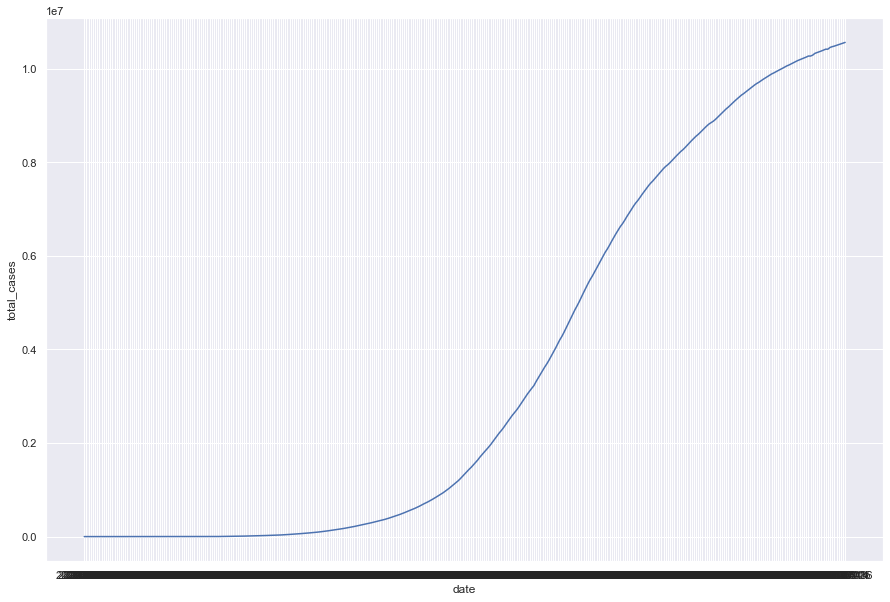

In [21]:
#Total cases per day
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="total_cases",data=india_case)
plt.show()

In [22]:
#Making a dataframe for last 5 days
india_last_5_days=india_case.tail()

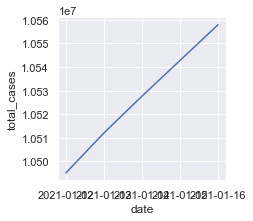

In [23]:
#Total cases in last 5 days
sns.set(rc={'figure.figsize':(3,3)})
sns.lineplot(x="date",y="total_cases",data=india_last_5_days)
plt.show()

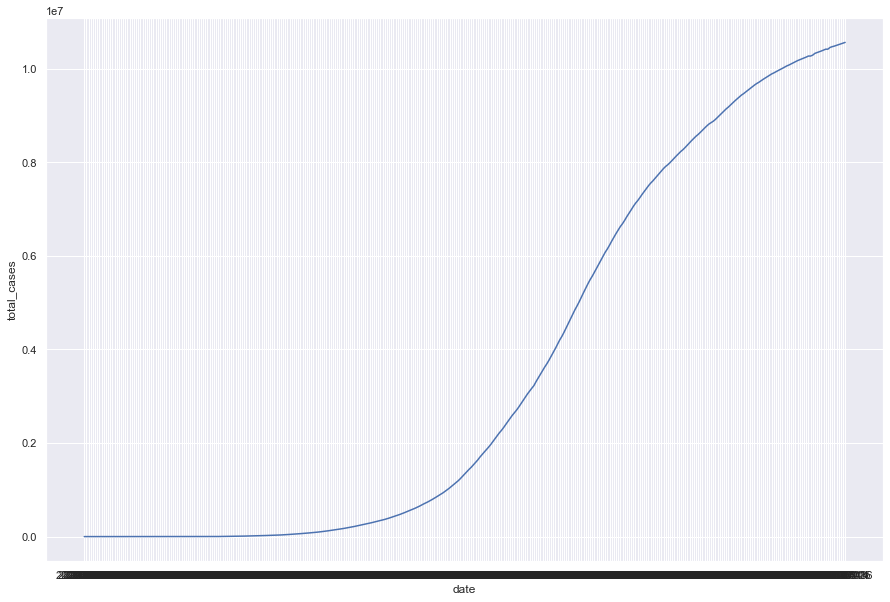

In [24]:
#Total tests per day
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="total_cases",data=india_case)
plt.show()

In [25]:
#Understanding cases of India, China and Japan
india_japan_china=covid[(covid["location"] =="India") | (covid["location"] =="China") | (covid["location"]=="Japan")]

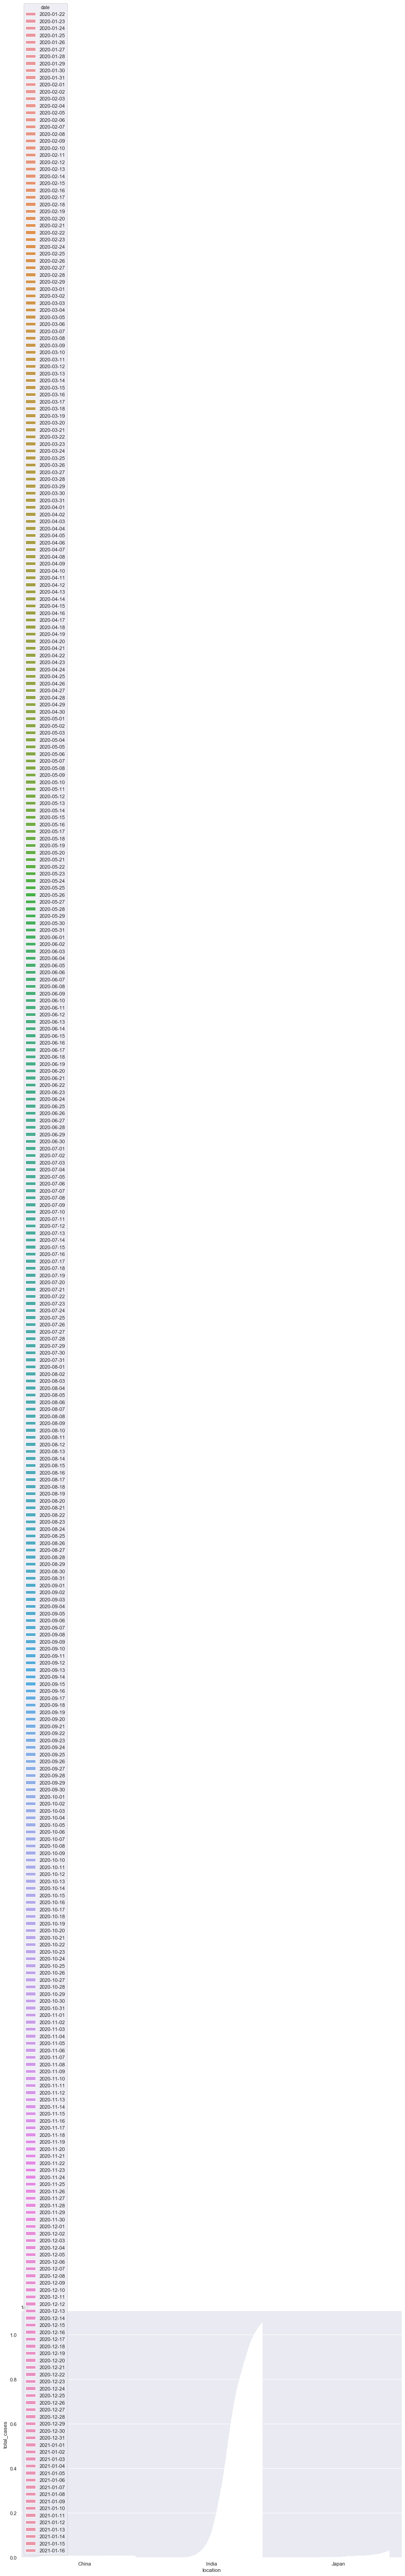

In [26]:
#Plotting growth of cases across China, India and Japan
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="location",y="total_cases",data=india_japan_china,hue="date")
plt.show()

In [27]:
#Getting latest data
last_day_cases=covid[covid["date"]=="2021-01-16"]
last_day_cases

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
327,2021-01-16,Afghanistan,107.0,12.0,53938.0,2336.0,538.0,72.0,2412.0,145.0
641,2021-01-16,Albania,581.0,5.0,67216.0,1270.0,4183.0,37.0,8225.0,80.0
968,2021-01-16,Algeria,230.0,4.0,103611.0,2831.0,1698.0,28.0,3452.0,62.0
1289,2021-01-16,Andorra,92.0,3.0,9038.0,91.0,452.0,6.0,872.0,7.0
1592,2021-01-16,Angola,86.0,3.0,18765.0,431.0,609.0,15.0,1157.0,24.0
...,...,...,...,...,...,...,...,...,...,...
58666,2021-01-16,Vietnam,1.0,0.0,1537.0,35.0,24.0,0.0,55.0,0.0
59027,2021-01-16,World,619197.0,13033.0,94495403.0,2022125.0,4803265.0,95487.0,9848068.0,186224.0
59309,2021-01-16,Yemen,1.0,0.0,2112.0,612.0,8.0,2.0,11.0,2.0
59614,2021-01-16,Zambia,1796.0,10.0,36074.0,537.0,9507.0,73.0,14844.0,145.0


In [28]:
india=covid[covid["location"]=="India"]
india.tail(10)

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
24473,2021-01-07,India,18139.0,234.0,10413417.0,150570.0,146743.0,1832.0,266572.0,3478.0
24474,2021-01-08,India,0.0,0.0,10413417.0,150570.0,126708.0,1576.0,244299.0,3227.0
24475,2021-01-09,India,36867.0,429.0,10450284.0,150999.0,126319.0,1564.0,262434.0,3377.0
24476,2021-01-10,India,16311.0,161.0,10466595.0,151160.0,126126.0,1511.0,258724.0,3259.0
24477,2021-01-11,India,12584.0,167.0,10479179.0,151327.0,122335.0,1477.0,254876.0,3174.0
24478,2021-01-12,India,15968.0,202.0,10495147.0,151529.0,120215.0,1415.0,250295.0,3090.0
24479,2021-01-13,India,16946.0,198.0,10512093.0,151727.0,116815.0,1391.0,245419.0,2989.0
24480,2021-01-14,India,15590.0,191.0,10527683.0,151918.0,114266.0,1348.0,261009.0,3180.0
24481,2021-01-15,India,15158.0,175.0,10542841.0,152093.0,129424.0,1523.0,256132.0,3099.0
24482,2021-01-16,India,15144.0,181.0,10557985.0,152274.0,107701.0,1275.0,234020.0,2839.0


In [29]:
india.isna().sum()

date                0
location            0
new_cases           0
new_deaths         41
total_cases         0
total_deaths       41
weekly_cases        5
weekly_deaths       5
biweekly_cases     12
biweekly_deaths    12
dtype: int64

In [30]:
mean_new_deaths=india['new_deaths'].mean()
mean_new_deaths
india['new_deaths']=india_case.replace(np.NaN,mean_new_deaths)

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
mean_total_deaths=india['total_deaths'].mean()
mean_total_deaths
india['total_deaths']=india.replace(np.NaN,mean_total_deaths)

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
mean_weekly_deaths=india['weekly_deaths'].mean()
mean_weekly_deaths
india['weekly_deaths']=india.replace(np.NaN,mean_weekly_deaths)

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
india.isna().sum()

date                0
location            0
new_cases           0
new_deaths          0
total_cases         0
total_deaths        0
weekly_cases        5
weekly_deaths       0
biweekly_cases     12
biweekly_deaths    12
dtype: int64

In [34]:
#Sorting data w.r.t total_cases
max_cases_country=last_day_cases.sort_values(by="total_cases",ascending=False)
max_cases_country

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
59027,2021-01-16,World,619197.0,13033.0,94495403.0,2022125.0,4803265.0,95487.0,9848068.0,186224.0
56994,2021-01-16,United States,202758.0,3352.0,23758855.0,395851.0,1565078.0,23335.0,3272308.0,45554.0
24482,2021-01-16,India,15144.0,181.0,10557985.0,152274.0,107701.0,1275.0,234020.0,2839.0
7651,2021-01-16,Brazil,61567.0,1050.0,8455059.0,209296.0,379061.0,6665.0,738654.0,13571.0
44330,2021-01-16,Russia,23670.0,576.0,3507201.0,64134.0,163026.0,3611.0,327303.0,6899.0
...,...,...,...,...,...,...,...,...,...,...
57997,2021-01-16,Vatican,0.0,NaN,27.0,NaN,0.0,0.0,0.0,0.0
48878,2021-01-16,Solomon Islands,0.0,NaN,17.0,NaN,0.0,0.0,0.0,0.0
34103,2021-01-16,Marshall Islands,0.0,NaN,4.0,NaN,0.0,0.0,0.0,0.0
45615,2021-01-16,Samoa,0.0,NaN,2.0,NaN,0.0,0.0,0.0,0.0


In [37]:
#Top 5 countries with maximum cases
max_cases_country[1:6]

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
56994,2021-01-16,United States,202758.0,3352.0,23758855.0,395851.0,1565078.0,23335.0,3272308.0,45554.0
24482,2021-01-16,India,15144.0,181.0,10557985.0,152274.0,107701.0,1275.0,234020.0,2839.0
7651,2021-01-16,Brazil,61567.0,1050.0,8455059.0,209296.0,379061.0,6665.0,738654.0,13571.0
44330,2021-01-16,Russia,23670.0,576.0,3507201.0,64134.0,163026.0,3611.0,327303.0,6899.0
56633,2021-01-16,United Kingdom,41428.0,1299.0,3367070.0,88747.0,340728.0,7747.0,759528.0,14065.0


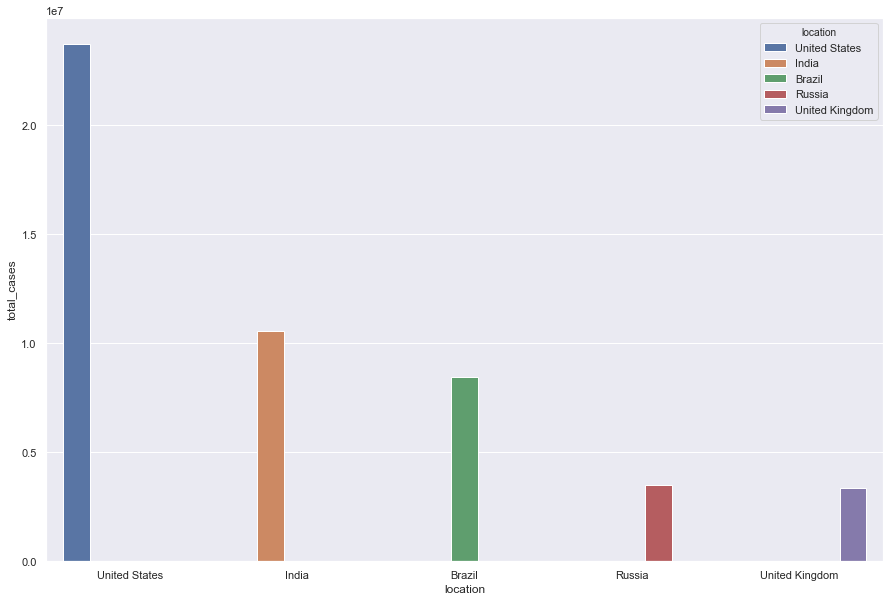

In [38]:
#Making bar-plot for countries with top cases
sns.barplot(x="location",y="total_cases",data=max_cases_country[1:6],hue="location")
plt.show()

In [35]:
india.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
24130,2020-01-30,India,1.0,2020-01-30,1.0,2020-01-30,NaN,2020-01-30,NaN,NaN
24131,2020-01-31,India,0.0,2020-01-31,1.0,2020-01-31,NaN,2020-01-31,NaN,NaN
24132,2020-02-01,India,0.0,2020-02-01,1.0,2020-02-01,NaN,2020-02-01,NaN,NaN
24133,2020-02-02,India,1.0,2020-02-02,2.0,2020-02-02,NaN,2020-02-02,NaN,NaN
24134,2020-02-03,India,1.0,2020-02-03,3.0,2020-02-03,NaN,2020-02-03,NaN,NaN


In [36]:
india.tail()

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
24478,2021-01-12,India,15968.0,2021-01-12,10495147.0,2021-01-12,120215.0,2021-01-12,250295.0,3090.0
24479,2021-01-13,India,16946.0,2021-01-13,10512093.0,2021-01-13,116815.0,2021-01-13,245419.0,2989.0
24480,2021-01-14,India,15590.0,2021-01-14,10527683.0,2021-01-14,114266.0,2021-01-14,261009.0,3180.0
24481,2021-01-15,India,15158.0,2021-01-15,10542841.0,2021-01-15,129424.0,2021-01-15,256132.0,3099.0
24482,2021-01-16,India,15144.0,2021-01-16,10557985.0,2021-01-16,107701.0,2021-01-16,234020.0,2839.0


In [37]:
#Linear regression
from sklearn.model_selection import train_test_split

In [38]:
#converting string date to date-time
import datetime as dt
india['date'] = pd.to_datetime(india['date']) 
india.head()

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
24130,2020-01-30,India,1.0,2020-01-30,1.0,2020-01-30,NaN,2020-01-30,NaN,NaN
24131,2020-01-31,India,0.0,2020-01-31,1.0,2020-01-31,NaN,2020-01-31,NaN,NaN
24132,2020-02-01,India,0.0,2020-02-01,1.0,2020-02-01,NaN,2020-02-01,NaN,NaN
24133,2020-02-02,India,1.0,2020-02-02,2.0,2020-02-02,NaN,2020-02-02,NaN,NaN
24134,2020-02-03,India,1.0,2020-02-03,3.0,2020-02-03,NaN,2020-02-03,NaN,NaN


In [52]:
india.tail()

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
24478,737802,India,15968.0,2021-01-12,10495147.0,2021-01-12,120215.0,2021-01-12,250295.0,3090.0
24479,737803,India,16946.0,2021-01-13,10512093.0,2021-01-13,116815.0,2021-01-13,245419.0,2989.0
24480,737804,India,15590.0,2021-01-14,10527683.0,2021-01-14,114266.0,2021-01-14,261009.0,3180.0
24481,737805,India,15158.0,2021-01-15,10542841.0,2021-01-15,129424.0,2021-01-15,256132.0,3099.0
24482,737806,India,15144.0,2021-01-16,10557985.0,2021-01-16,107701.0,2021-01-16,234020.0,2839.0


In [40]:
#converting date-time to ordinal
india['date']=india['date'].map(dt.datetime.toordinal)
india.head()

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
24130,737454,India,1.0,2020-01-30,1.0,2020-01-30,NaN,2020-01-30,NaN,NaN
24131,737455,India,0.0,2020-01-31,1.0,2020-01-31,NaN,2020-01-31,NaN,NaN
24132,737456,India,0.0,2020-02-01,1.0,2020-02-01,NaN,2020-02-01,NaN,NaN
24133,737457,India,1.0,2020-02-02,2.0,2020-02-02,NaN,2020-02-02,NaN,NaN
24134,737458,India,1.0,2020-02-03,3.0,2020-02-03,NaN,2020-02-03,NaN,NaN


In [81]:
#getting dependent variable and inpedent variable
x=india['date']
y=india['total_cases']

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
lr = LinearRegression()

In [85]:
import numpy as np
lr.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
india.tail()

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
24478,737802,India,15968.0,2021-01-12,10495147.0,2021-01-12,120215.0,2021-01-12,250295.0,3090.0
24479,737803,India,16946.0,2021-01-13,10512093.0,2021-01-13,116815.0,2021-01-13,245419.0,2989.0
24480,737804,India,15590.0,2021-01-14,10527683.0,2021-01-14,114266.0,2021-01-14,261009.0,3180.0
24481,737805,India,15158.0,2021-01-15,10542841.0,2021-01-15,129424.0,2021-01-15,256132.0,3099.0
24482,737806,India,15144.0,2021-01-16,10557985.0,2021-01-16,107701.0,2021-01-16,234020.0,2839.0


In [87]:
y_pred=lr.predict(np.array(x_test).reshape(-1,1))

In [88]:
from sklearn.metrics import mean_squared_error

In [89]:
np.sqrt(mean_squared_error(x_test,y_pred))

4730024.173647577

In [90]:
lr.predict(np.array([[737807]]))

array([[9940001.47703934]])

In [91]:
from sklearn.metrics import r2_score
R2score=r2_score(y_test,y_pred)
R2score

0.8764982386309129